# Appendix A (TSA)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("MHPIquarter.csv",header = 0, index_col = 0)
data.head()

,House Price Index
Date,
01/01/2010,97.2
01/04/2010,100.4
01/07/2010,102.0
01/10/2010,104.3
01/01/2011,106.4


In [2]:
data.describe()

,House Price Index
count,52.000000
mean,166.405769
std,36.128417
min,97.200000
25%,136.850000
50%,176.450000
75%,198.975000
max,213.000000


In [3]:
data.isna().sum()

House Price Index    0
dtype: int64

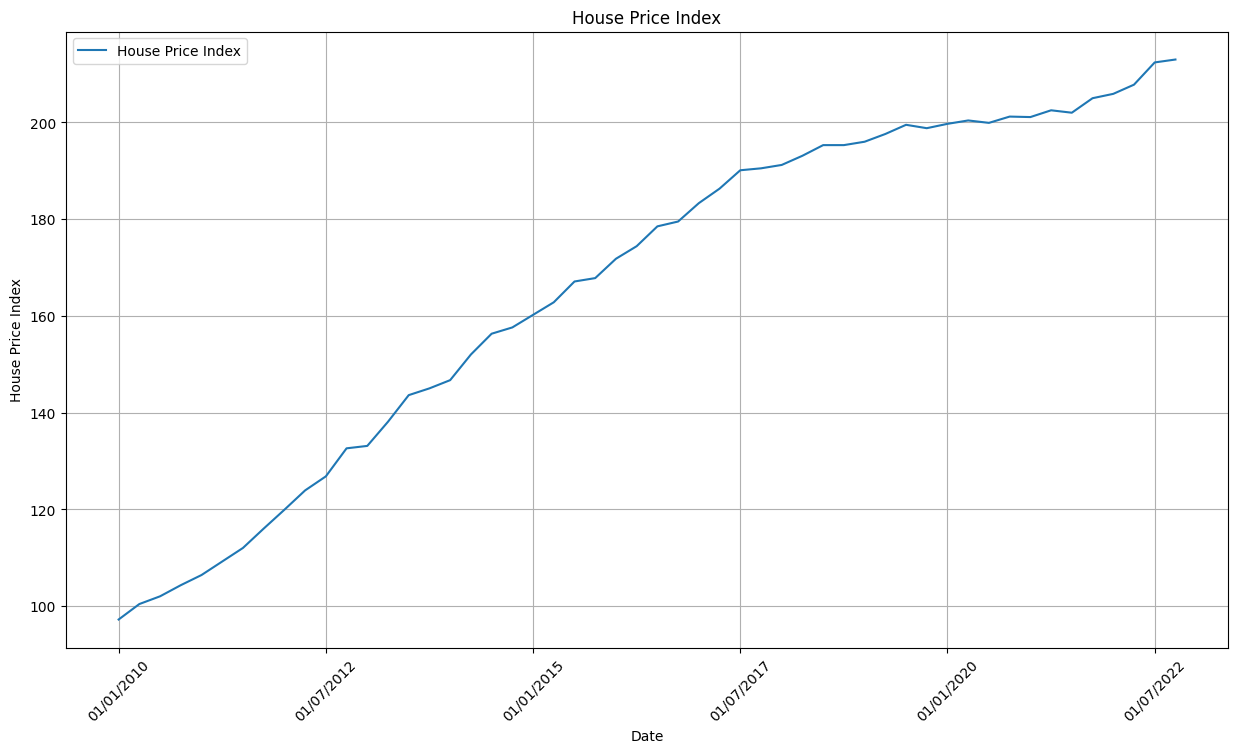

In [4]:
#plot the time series data
from matplotlib import pyplot
data.plot(figsize = (15, 8), title = 'House Price Index', fontsize = 10)
# Set labels and title
plt.xlabel('Date')
plt.ylabel('House Price Index')

# Add gridlines
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()


In [5]:
#Split data training (in-sample) & testing (out-sample)
training = data[0:42] 
testing = data[42:] 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing

# Create the simple exponential smoothing model and fit it to the training data
model = SimpleExpSmoothing(training)
model = model.fit(smoothing_level=0.6)
model.summary()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,House Price Index,No. Observations:,42
Model:,SimpleExpSmoothing,SSE,861.708
Optimized:,True,AIC,130.892
Trend:,None,BIC,134.368
Seasonal:,None,AICC,131.973
Seasonal Periods:,None,Date:,"Sun, 25 Jun 2023"
Box-Cox:,False,Time:,15:55:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6000000,alpha,False
initial_level,98.987870,l.0,True


In [7]:
# initialize variables for storing predictions and actual values
predictions = []
actuals = []

# iterate over each time step in the testing data
for i in range(len(testing)):
    # make one-step ahead forecast
    yhat = model.forecast()
    
    # store prediction and actual value
    predictions.append(yhat)
    actuals.append(testing.iloc[i])
    
    # add actual value to training data
    training = pd.concat([training, pd.DataFrame([testing.iloc[i]], columns=training.columns)], ignore_index=True)
    
    # retrain model on updated training data
    model = SimpleExpSmoothing(training)
    model = model.fit(smoothing_level=0.6)

    last_actual_value = testing.iloc[-1]

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [8]:
actuals

[House Price Index    199.9
 Name: 01/07/2020, dtype: float64,
 House Price Index    201.2
 Name: 01/10/2020, dtype: float64,
 House Price Index    201.1
 Name: 01/01/2021, dtype: float64,
 House Price Index    202.5
 Name: 01/04/2021, dtype: float64,
 House Price Index    202.0
 Name: 01/07/2021, dtype: float64,
 House Price Index    205.0
 Name: 01/10/2021, dtype: float64,
 House Price Index    205.9
 Name: 01/01/2022, dtype: float64,
 House Price Index    207.8
 Name: 01/04/2022, dtype: float64,
 House Price Index    212.4
 Name: 01/07/2022, dtype: float64,
 House Price Index    213.0
 Name: 01/10/2022, dtype: float64]

In [9]:
predictions

[42    199.950781
 dtype: float64,
 43    199.920312
 dtype: float64,
 44    200.688125
 dtype: float64,
 45    200.93525
 dtype: float64,
 46    201.8741
 dtype: float64,
 47    201.94964
 dtype: float64,
 48    203.779856
 dtype: float64,
 49    205.051942
 dtype: float64,
 50    206.700777
 dtype: float64,
 51    210.120311
 dtype: float64]

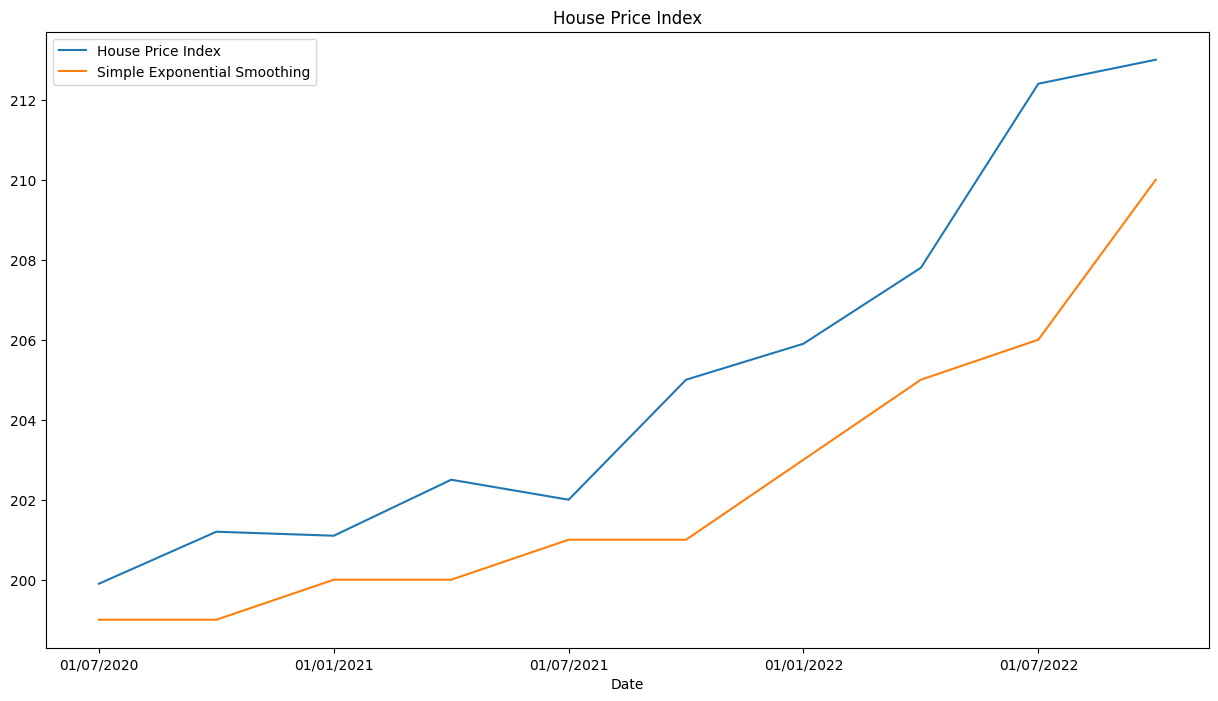

In [10]:
import numpy as np
a=np.array(predictions) #convert predictions into array
a=np.asarray(a, dtype = 'int') #convert into integer
testing_forecasted=pd.DataFrame(a, columns=['Simple Exponential Smoothing']) #convert into Dataframe
testing=testing.reset_index()#reset index testing data
frames=[testing, testing_forecasted]#combine actual and forecast testing data
result = pd.concat(frames, axis=1)
result= result.set_index('Date')
#plot comparison actual out-sample with forecasted out-sample
import matplotlib.pyplot as plt
result.plot(figsize=(15, 8),title = 'House Price Index', fontsize = 10)
plt.show()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
forecast_rmse_error = rmse(testing['House Price Index'], testing_forecasted['Simple Exponential Smoothing'])
forecast_mse_error = forecast_rmse_error**2
forecast_mean_value = data['House Price Index'].mean()
forecast_mae_error = mean_absolute_error(testing['House Price Index'], testing_forecasted['Simple Exponential Smoothing'])

print(f"MAE: {forecast_mae_error}")
print(f"MSE Error: {forecast_mse_error}\nRMSE Error: {forecast_rmse_error}\nMean: {forecast_mean_value}")

MAE: 2.680000000000001
MSE Error: 9.632000000000014
RMSE Error: 3.103546358603334
Mean: 166.4057692307692


In [12]:
# Generate forecasts for the next n_periods points beyond the end of the testing set
n_periods = 32 # one step ahead
forecasts1=model.forecast(steps=n_periods)
forecasts1

52    211.848124
53    211.848124
54    211.848124
55    211.848124
56    211.848124
57    211.848124
58    211.848124
59    211.848124
60    211.848124
61    211.848124
62    211.848124
63    211.848124
64    211.848124
65    211.848124
66    211.848124
67    211.848124
68    211.848124
69    211.848124
70    211.848124
71    211.848124
72    211.848124
73    211.848124
74    211.848124
75    211.848124
76    211.848124
77    211.848124
78    211.848124
79    211.848124
80    211.848124
81    211.848124
82    211.848124
83    211.848124
dtype: float64

## Holt's method

In [13]:
data.head()

,House Price Index
Date,
01/01/2010,97.2
01/04/2010,100.4
01/07/2010,102.0
01/10/2010,104.3
01/01/2011,106.4


In [14]:
#Split data training (in-sample) & testing (out-sample)
training = data[0:42] 
testing = data[42:] 

In [15]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Fit the double exponential smoothing model to the training data
model2 = Holt(training, initialization_method="known", initial_level=98.987870, initial_trend=0)
model2 = model2.fit(smoothing_level=0.6, smoothing_trend=0.5, optimized=False)
model2.summary()

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,House Price Index,No. Observations:,42
Model:,Holt,SSE,103.456
Optimized:,False,AIC,45.862
Trend:,Additive,BIC,52.813
Seasonal:,None,AICC,48.262
Seasonal Periods:,None,Date:,"Sun, 25 Jun 2023"
Box-Cox:,False,Time:,15:55:41
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.6000000,alpha,False
smoothing_trend,0.5000000,beta,False


In [16]:
# initialize variables for storing predictions and actual values
predictions2 = []
actuals = []

# iterate over each time step in the testing data
for i in range(len(testing)):
    # make one-step ahead forecast
    yhat = model2.forecast()
    
    # store prediction and actual value
    predictions2.append(yhat)
    actuals.append(testing.iloc[i])
    
    # add actual value to training data
    training = pd.concat([training, pd.DataFrame([testing.iloc[i]], columns=training.columns)], ignore_index=True)
    
    # retrain model on updated training data
    model2 = Holt(training, initialization_method="known", initial_level=98.987870, initial_trend=0)
    model2 = model2.fit(smoothing_level=0.6, smoothing_trend=0.5, optimized=False)
    
    last_actual_value = testing.iloc[-1]

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [17]:
predictions2

[42    201.074574
 dtype: float64,
 43    200.623735
 dtype: float64,
 44    201.396278
 dtype: float64,
 45    201.556412
 dtype: float64,
 46    202.743542
 dtype: float64,
 47    202.695332
 dtype: float64,
 48    205.167448
 dtype: float64,
 49    206.91606
 dtype: float64,
 50    209.020687
 dtype: float64,
 51    213.636332
 dtype: float64]

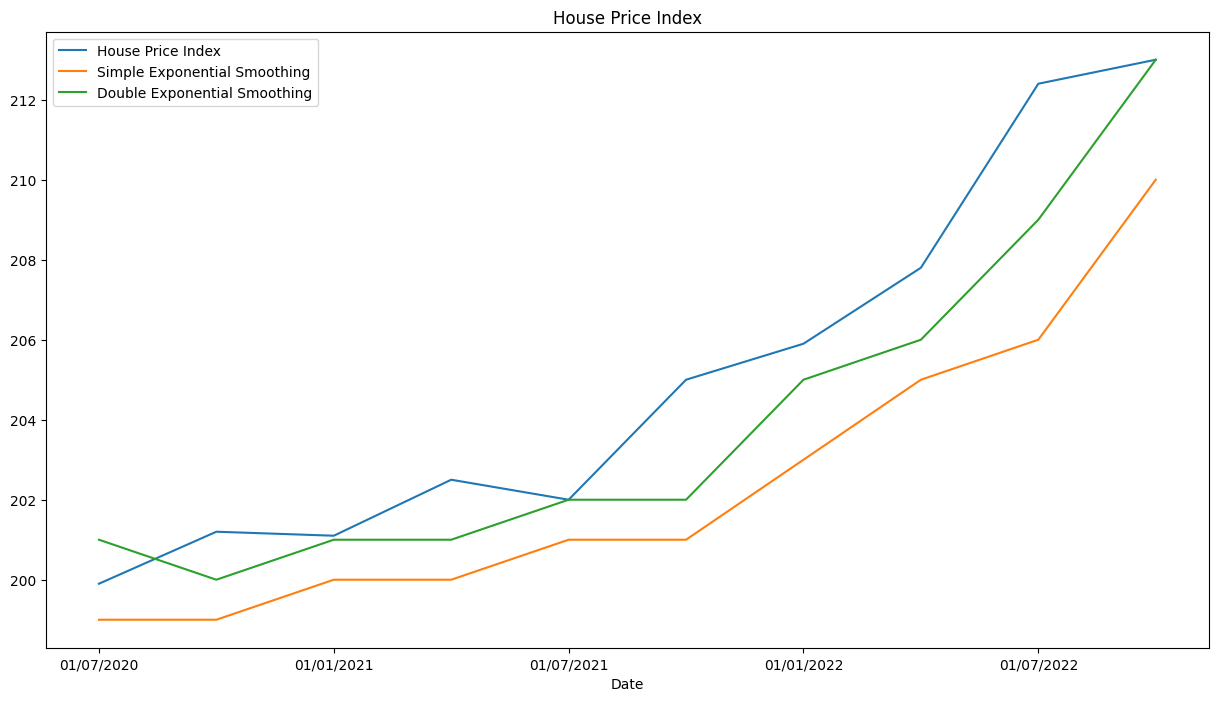

In [18]:
import numpy as np
b=np.array(predictions2) #convert predictions into array
b=np.asarray(b, dtype = 'int') #convert into integer
testing_forecasted2=pd.DataFrame(b, columns=['Double Exponential Smoothing']) #convert into Dataframe
testing=testing.reset_index()#reset index testing data
frames=[testing, testing_forecasted, testing_forecasted2]#combine actual and forecast testing data
result = pd.concat(frames, axis=1)
result= result.set_index('Date')
#plot comparison actual out-sample with forecasted out-sample
import matplotlib.pyplot as plt
result.plot(figsize=(15, 8),title = 'House Price Index', fontsize = 10)
plt.show()

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
forecast2_rmse_error = rmse(testing['House Price Index'], testing_forecasted2['Double Exponential Smoothing'])
forecast2_mse_error = forecast2_rmse_error**2
forecast2_mean_value = data['House Price Index'].mean()
forecast2_mae_error = mean_absolute_error(testing['House Price Index'], testing_forecasted2['Double Exponential Smoothing'])

print(f"MAE: {forecast2_mae_error}")
print(f"MSE Error: {forecast2_mse_error}\nRMSE Error: {forecast2_rmse_error}\nMean: {forecast2_mean_value}")

MAE: 1.3
MSE Error: 2.952000000000005
RMSE Error: 1.7181385275931638
Mean: 166.4057692307692


In [20]:
# Generate forecasts for the next n_periods points beyond the end of the testing set
n_periods = 32 # one step ahead
forecasts2=model2.forecast(steps=n_periods)
forecasts2

52    215.651690
53    218.048847
54    220.446005
55    222.843162
56    225.240319
57    227.637477
58    230.034634
59    232.431791
60    234.828949
61    237.226106
62    239.623263
63    242.020421
64    244.417578
65    246.814735
66    249.211893
67    251.609050
68    254.006207
69    256.403365
70    258.800522
71    261.197679
72    263.594837
73    265.991994
74    268.389151
75    270.786309
76    273.183466
77    275.580623
78    277.977781
79    280.374938
80    282.772096
81    285.169253
82    287.566410
83    289.963568
dtype: float64

In [21]:
forecasts2
dse= pd.DataFrame(forecasts2)
dse.to_csv('HPI_dse.csv')

## Holt-Winter's method

In [22]:
data.head()

,House Price Index
Date,
01/01/2010,97.2
01/04/2010,100.4
01/07/2010,102.0
01/10/2010,104.3
01/01/2011,106.4


In [23]:
#Split data training (in-sample) & testing (out-sample)
training = data[0:42] 
testing = data[42:] 

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

# Fit triple exponential smoothing model without seasonal component and quarterly periods
model3 = ExponentialSmoothing(training['House Price Index'], trend='add', seasonal=None, seasonal_periods=4).fit()
model3.summary()


C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,House Price Index,No. Observations:,42
Model:,ExponentialSmoothing,SSE,78.607
Optimized:,True,AIC,34.325
Trend:,Additive,BIC,41.276
Seasonal:,None,AICC,36.725
Seasonal Periods:,None,Date:,"Sun, 25 Jun 2023"
Box-Cox:,False,Time:,15:55:42
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.5243658,alpha,True
smoothing_trend,0.5243658,beta,True


In [25]:
# initialize variables for storing predictions and actual values
predictions3 = []
actuals = []

# iterate over each time step in the testing data
for i in range(len(testing)):
    # make one-step ahead forecast
    yhat = model3.forecast()
    
    # store prediction and actual value
    predictions3.append(yhat)
    actuals.append(testing.iloc[i])
    
    # add actual value to training data
    training = pd.concat([training, pd.DataFrame([testing.iloc[i]], columns=training.columns)], ignore_index=True)
    
    # retrain model on updated training data
    model3 = ExponentialSmoothing(training['House Price Index'], trend='add', seasonal=None, seasonal_periods=4).fit()
    model3.summary()
    
    last_actual_value = testing.iloc[-1]

C:\Users\Asus\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [26]:
predictions3

[42    201.12456
 dtype: float64,
 43    200.743037
 dtype: float64,
 44    201.379509
 dtype: float64,
 45    201.548328
 dtype: float64,
 46    202.62449
 dtype: float64,
 47    202.702294
 dtype: float64,
 48    204.939662
 dtype: float64,
 49    206.775795
 dtype: float64,
 50    208.956056
 dtype: float64,
 51    213.610948
 dtype: float64]

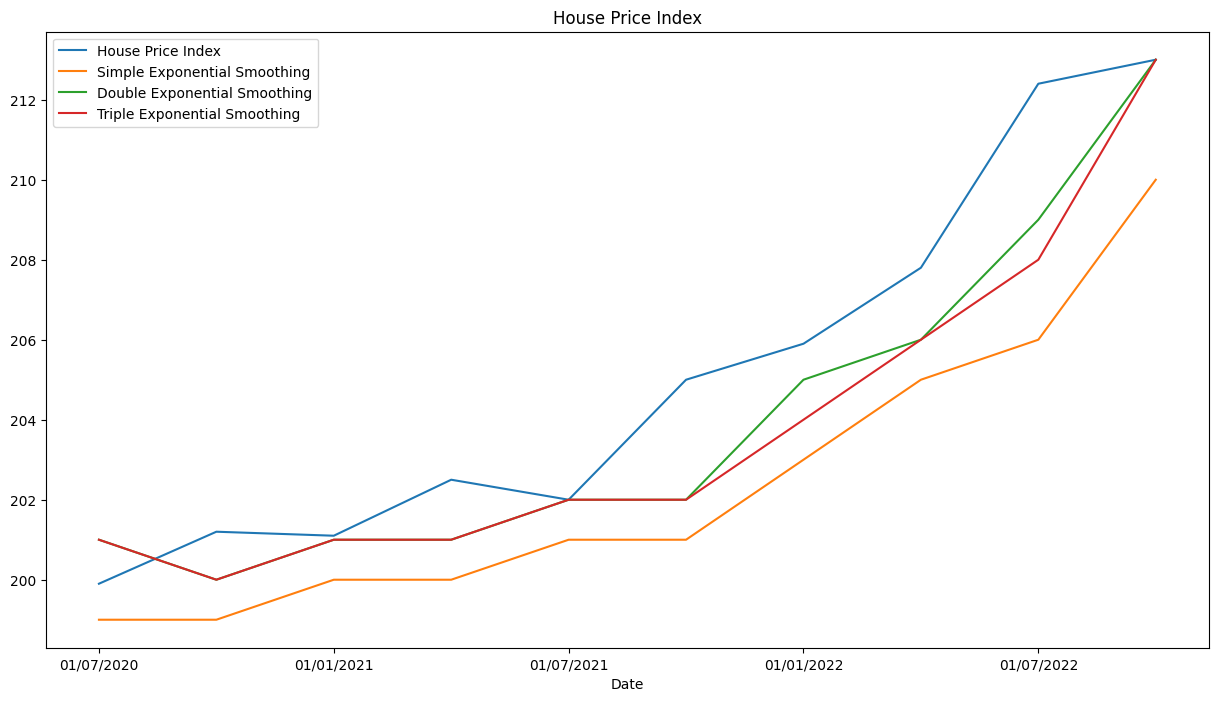

In [27]:
import numpy as np
c=np.array(predictions3) #convert predictions into array
c=np.asarray(c, dtype = 'int') #convert into integer
testing_forecasted3=pd.DataFrame(c, columns=['Triple Exponential Smoothing']) #convert into Dataframe
testing=testing.reset_index()#reset index testing data
frames=[testing, testing_forecasted, testing_forecasted2, testing_forecasted3]#combine actual and forecast testing data
result = pd.concat(frames, axis=1)
result= result.set_index('Date')
#plot comparison actual out-sample with forecasted out-sample
import matplotlib.pyplot as plt
result.plot(figsize=(15, 8),title = 'House Price Index', fontsize = 10)
plt.show()

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.tools.eval_measures import rmse
forecast3_rmse_error = rmse(testing['House Price Index'], testing_forecasted3['Triple Exponential Smoothing'])
forecast3_mse_error = forecast3_rmse_error**2
forecast3_mean_value = data['House Price Index'].mean()
forecast3_mae_error = mean_absolute_error(testing['House Price Index'], testing_forecasted3['Triple Exponential Smoothing'])

print(f"MAE: {forecast3_mae_error}")
print(f"MSE Error: {forecast3_mse_error}\nRMSE Error: {forecast3_rmse_error}\nMean: {forecast3_mean_value}")

MAE: 1.5
MSE Error: 4.012000000000006
RMSE Error: 2.0029977533686867
Mean: 166.4057692307692


In [29]:
# Generate forecasts for the next n_periods points beyond the end of the testing set
n_periods = 32 # one step ahead
forecasts3=model3.forecast(steps=n_periods)
forecasts3

52    215.741659
53    218.236183
54    220.730706
55    223.225230
56    225.719754
57    228.214277
58    230.708801
59    233.203325
60    235.697849
61    238.192372
62    240.686896
63    243.181420
64    245.675943
65    248.170467
66    250.664991
67    253.159514
68    255.654038
69    258.148562
70    260.643085
71    263.137609
72    265.632133
73    268.126656
74    270.621180
75    273.115704
76    275.610227
77    278.104751
78    280.599275
79    283.093798
80    285.588322
81    288.082846
82    290.577369
83    293.071893
dtype: float64

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("HPI_dse_final.csv",header = 0, index_col = 0)
data.tail()

,House Price Index
Date,
01/10/2029,280.4
01/01/2030,282.8
01/04/2030,285.2
01/07/2030,287.6
01/10/2030,290.0


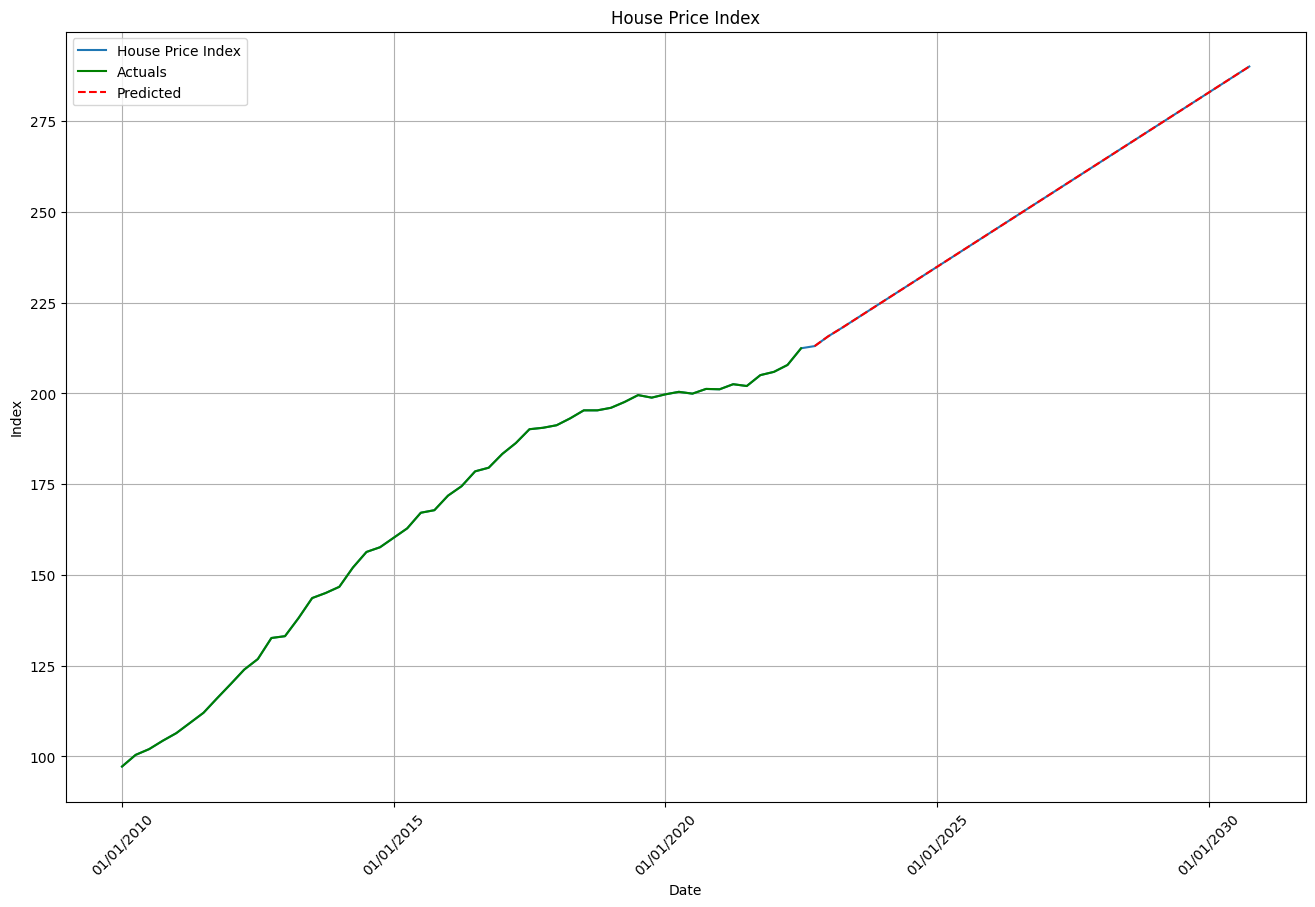

In [35]:
from matplotlib import pyplot as plt

# Plot the entire data
data.plot(figsize=(16, 10), title='House Price Index', fontsize=10)

# Define the start and end indices
start_index = 51
end_index = 84

# Plot the first segment with a solid green line
plt.plot(data.index[:start_index], data['House Price Index'][:start_index], color='green', linestyle='solid', label='Actuals')

# Plot the second segment with a dashed yellow line
plt.plot(data.index[start_index:end_index + 1], data['House Price Index'][start_index:end_index + 1], color='red', linestyle='dashed', label='Predicted')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Index')

# Add gridlines
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.show()
